# Data Augmentation using PyTorch

Let's start by importing all the libraries required and configure the matplotlib to display larger plots

In [ ]:
import PIL
import numpy as np
import torch
import torchvision

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

We need some sample images to perform augmentation. Let's import them from the pytorch-examples repository.

In [ ]:
!git clone https://github.com/fabioperez/pytorch-examples/

Cloning into 'pytorch-examples'...
remote: Enumerating objects: 102, done.
remote: Total 102 (delta 0), reused 0 (delta 0), pack-reused 102
Receiving objects: 100% (102/102), 14.79 MiB | 29.12 MiB/s, done.
Resolving deltas: 100% (12/12), done.



Augmenting data with PyTorch is very straightforward. We can use the transforms provided in torchvision: [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html).

To compose several transforms together, we use [`torchvision.transforms.Compose`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) and pass the transforms as a list. The transforms are applied following the list order.

**Important note**

For training we should probably also add [`transforms.ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) to convert the images to a PyTorch Tensor and [`transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) to normalize the images according to the network that you will train. We will omit these steps since the focus for this tutorial is only to display the augmented images.

In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=0.05, saturation=0.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20)
])

Then pass the transforms to [`torchvision.datasets.ImageFolder`](https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder) and the images will be automatically augmented.

In [ ]:
dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/classification/', transform=transforms)

That's all! Now let's diplay some of the transformed images:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


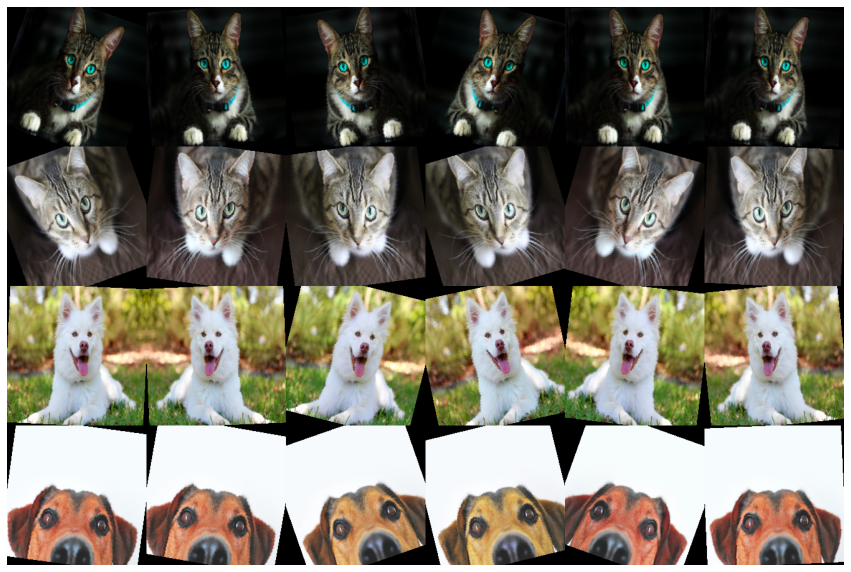

In [ ]:
show_dataset(dataset)